## Seaborn을 이용한 선형 회귀 및 데이터 시각화
- 이번 시간에는 영화 예산과 수익에 대한 자료를 들여다 본다. 이런 DataSet는 "Scikit-Learn"과 같은 툴을 통해 선형 회귀 분석을 실행하고, "Matplotlib"을 기반으로 구축된 데이터 시각화 라이브러리인 "Seaborn"을 사용하기에 매우 적합하다.

<img src="asset/movies.png">

- 이번 시간에 우리가 답할 질문은, 더 많은 영화 예산은 박스 오피스에서 더 많은 수익으로 이어지는지에 대한 것이다.
- 다른 말로, "영화 스튜디오는 더 많은 영화 제작을 위해 영화에 더 많은 돈을 써야하는 것인가?" 이다.

### 이번 시간 Study 내용 
1. "Seaborn"이라는, 유명한 데이터 시각화 라이브러리 사용 방법

<img src="asset/seaborn.png">

2. "Scikit-Learn"을 이용해 선형 회귀 분석을 실행하고 해석

<img src="asset/sklearn.png">

3. 데이터간의 관계를 시각화하는 산점도를 통해, 회귀 분석을 표시하는 방법

3. 산점도에 세 번째 차원을 추가하여 거품 차트를 만드는 방법

3. 내림 나눗셈(//)을 영리하게 사용해, 데이터를 변환하는 방법

### 1. 데이터 탐색 및 정리하기 

In [1]:
# 필요한 패키지 임포트 
import pandas as pd
import numpy as np

In [2]:
# 데이터 불러오기 
df = pd.read_csv('data/cost_revenue_dirty.csv')
print(f'Data shape is {df.shape}')
df

Data shape is (5391, 6)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


In [3]:
# NaN값 확인
df.isnull().sum()
# or df.isna().values.any()

Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

In [4]:
# 중복값 확인 
print(df.duplicated(keep=False).sum())
# or data.duplicated().values.any()

0


In [5]:
# 부분 집합을 만들고 집합의 길이 확인 - 중복 수 확인
duplicated_rows = df[df.duplicated()]
len(duplicated_rows)

0

In [6]:
# 각 열의 데이터 유형 확인 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [7]:
# 예산 및 총 수익 데이터 각종 특수문자 제거 및 정수형으로 데이터 변환 
df['USD_Production_Budget'] = df['USD_Production_Budget'].replace('[\$,]', '', regex=True).astype(int)
df['USD_Worldwide_Gross'] = df['USD_Worldwide_Gross'].replace('[\$,]', '', regex=True).astype(int)
df['USD_Domestic_Gross'] = df['USD_Domestic_Gross'].replace('[\$,]', '', regex=True).astype(int)

In [8]:
# Release_Date, datetime type으로 변환 
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [9]:
# 위를 한번에 처리하기 위한 코드
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget', 
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']
 
for col in columns_to_clean:
    for char in chars_to_remove:
        # Replace each character with an empty string
        df[col] = df[col].astype(str).str.replace(char, "")
    # Convert column to a numeric data type
    df[col] = pd.to_numeric(df[col])

/var/folders/6t/12w79lnx68sczzc5f6xs76z80000gn/T/ipykernel_13191/3239217400.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].astype(str).str.replace(char, "")


In [10]:
df

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0


In [11]:
# 데이터 전처리 후 데이터 타입 확인 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


- 데이터들을 분석에 맞게 전처리 작업을 진행하였다.
- 여기까지 확인 결과 데이터는 총 행 5,391개, 열 6개로 조회 되었다.
- NaN과 중복값은 확인되지 않았다. 
- 각 열의 정보와 데이터 유형은 아래와 같다. 
    - Rank(int): 영화 순위
    - Release_Date(datetime): 영화 개봉 날짜 
    - Movie_Title(str): 영화 제목 
    - USD_Production_Budget(int): 영화 예산 (USD 달러)
    - USD_Worldwide_Gross(int): 전세계 수입 총액 (USD 달러)
    - USD_Domestic_Gross(int): 국내 수입 총액 (USD 달러)

### 2. 수익이 "0"인 영화 조사하기 

#### 2-1. 영화 수익 조사

In [12]:
# 데이터 통계 내역 확인
df.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,5391.000000,5.391000e+03,5.391000e+03,5.391000e+03
mean,2696.000000,3.111374e+07,8.885542e+07,4.123552e+07
std,1556.391981,4.052380e+07,1.684578e+08,6.602935e+07
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,1348.500000,5.000000e+06,3.865206e+06,1.330902e+06
50%,2696.000000,1.700000e+07,2.745045e+07,1.719220e+07
75%,4043.500000,4.000000e+07,9.645446e+07,5.234369e+07
max,5391.000000,4.250000e+08,2.783919e+09,9.366622e+08


In [13]:
# 영화들의 평균 제작 예산 
production_budget_films = round(df['USD_Production_Budget'].mean(), 2)
print(f'The average production budget of films: ${production_budget_films}')

The average production budget of films: $31113737.58


In [14]:
# 전세계 최소 매출 
min_world_gross = df['USD_Worldwide_Gross'].min()
# 국내 최소 매출
min_domestic_gross = df['USD_Domestic_Gross'].min()

print(f'Minimum worldwide sales is ${min_world_gross}')
print(f'Minimum Domestic sales is ${min_domestic_gross}')

Minimum worldwide sales is $0
Minimum Domestic sales is $0


In [15]:
# 전세계 최대 매출 
max_world_gross = round(df['USD_Worldwide_Gross'].max(), 2)
# 국내 최대 매출
max_domestic_gross = round(df['USD_Domestic_Gross'].max(), 2)

print(f'Maximum worldwide sales is ${max_world_gross}')
print(f'Maximum minimum sales is ${max_domestic_gross}')

Maximum worldwide sales is $2783918982
Maximum minimum sales is $936662225


- 평균적인 영화 제작비는 약 "3,100만 달러"이며 전 세계 수익의 3배(또는 약 8,900만 달러)를 벌어들인다.
- 하지만 많은 영화들이 돈을 날리기도 한다. 하위 4분위에 있는 모든 영화들은 평균 예산(비용)이 5백만 달러지만 전 세계적으로 380만 달러의 수입만을 올리기 때문에 손해를 본다. 
- 국내 및 전 세계 최소 수익은 "0 달러" 이다.
- 반면, 최고 생산 예산은 "4억 2,500만 달러"였고, 전 세계적으로 가장 높은 수익은 "27억 달러"였다.

In [16]:
# 예산이 적게 드는 영화 조회 
df[df.USD_Production_Budget == 1100]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


- 예산이 적게드는 영화는 "My Date With Drew"이다. 하지만 전세계 수익 및 국내 수익 금액을 보니 예산 대비 돈을 많이 버는 것으로 나타났다(예산: 1,100 달러 / 수익: 181,041달러, 약 16,458%).

In [17]:
# 예산이 가장 많이 들어간 영화 조회
df[df.USD_Production_Budget == 425000000]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


- 데이터 상 가장 많은 예산이 들어간 영화는 "Avatar" 이다.

#### 2-2. 국내 매출이 없는 영화들

In [18]:
# 미국 국내 매출이 없는 영화 조회 
zero_domestic = df[df.USD_Domestic_Gross == 0]
print(f'Number of films that grossed $0 domestically {len(zero_domestic)}')
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 domestically 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


- 데이터에는 미국에서 수익이 없는 512개의 영화가 있다. 
- 여기서 초고액 예산으로 수익을 올리지 못한 영화의 개봉일은 데이터 셋이 컴파일된 날짜 이후인 "2018년 05일 1일" 이다.

#### 2-3.  세계 매출이 없는 영화들 

In [19]:
# 월드 와이드 기준 매출이 없는 영화들 조회
zero_worldwide = df[df.USD_Worldwide_Gross == 0]
print(f'Number of films that grossed $0 worldwide {len(zero_worldwide)}')
zero_worldwide.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 worldwide 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


- 전 세계 월드 와이드 기준 수익을 확인해보면 돈을 벌지 못한 영화가 375편이나 되는 것을 알 수 있다. 
- 자료가 정리된 시점을 기준으로 아직 개방되지 않은 영화도 있지만 그것을 감안하더라도 (미국 국내 0 매출 vs 월드 와이드 0 매출)512 대 357 이다.
- 이렇게 차이가 나는 이유는 몇몇 국제 영화들은 상영되지 않았기 때문이다. 
- 2-2 자료를 보면 ‘Don Gato, el inicio de la pandilla’는 박스오피스에서 약 450만 달러를 벌어 들였지만, 미국에서는 수익이 없었다. 제작비가 8천만 달러나 든다는 것을 고려하면, 미국 국내에서도 상영해서 매출을 끌어 올려야 했다.

### 3. 다중 조건으로 필터링 하기: 해외 영화 
- 지금까지, 하나의 조건을 기반으로 데이터프레임의 하위 세트를 만들었다. 하지만 둘 이상의 조건을 기반으로 데이터를 선택하려면 어떻게 해야할까? 
- 첫 번째 방법은 "비트" 및 "& 연산자"를 결합하여 ".loc[] 속성"을 사용한다.

#### 3-1. 영화 중 국내 수익은 없고, 월드 와이드 수익이 있는 영화 조회 

In [20]:
# 두 가지 이상의 조건(월드 와이드와 국내 수익이 없는 영화들) 필터링 - "& 연산자 사용"
international_release = df.loc[(df.USD_Domestic_Gross == 0) & (df.USD_Worldwide_Gross == 0)]
international_release

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
27,4789,1941-10-28,How Green Was My Valley,1250000,0,0
...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0


- 위의 결과가 왜 동작할까? Pandas는 파이썬 비트 연산자를 이용하여 Numpy를 기반으로 만들어졌다. 그리고 비트 연산자를 통해 Numpy와 Pandas의 각 요소들을 비교할 수 있다.

In [21]:
# 비트 연산자를 통해 Numpy와 Pandas의 각 요소들을 비교
bool_list1 = [True, True, False, False]
bool_list2 = [False, True, True, False]

np.array(bool_list1) & np.array(bool_list2)

array([False,  True, False, False])

- 하지만 우리가 확인할 것은 국내 매출이 0이고 전세게 매출은 0에 아닌 영화이다. 비트 연산자가 우선적으로 작동하므로, 우리는 우선 순위 변경을 위해 괄호를 표함시켜야 한다.

In [23]:
# 국내 매출은 0이고 월드 와이드 매출은 0이 아닌 데이터 필터링 - 비트 연산자 이용
international_release = df.loc[(df.USD_Domestic_Gross == 0) & 
                               (df.USD_Worldwide_Gross != 0)]
print(f'Number of International releases: {len(international_release)}')
international_release.head()

Number of International releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


In [27]:
# 국내 매출은 0이고 월드 와이드 매출은 0이 아닌 데이터 필터링 - pandas query 함수 사용 (and 연산자 사용)
international_release = df.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f'Number of International releases: {len(international_release)}')
international_release.tail()

Number of International releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0


#### 3-2. 개봉되지 않은 영화 

In [32]:
# 2018년 5월 1일 기준 아직 개봉 하지 않은 영화들 추출
future_release = df[df['Release_Date'] >= '2018-05-01']
print(f'Number of unreleased movies: {len(future_release)}')
future_release

Number of unreleased movies: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


- 2018년 05월 01일 기준 아직 개봉되지 않은 영화들은 총 7편이다.

In [33]:
# 2018년 5월 1일 기준 미개봉 영화 제외 후 다시 데이터 저장
data_clean = df.drop(future_release.index)
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343


#### 3-3. 제작 예산을 회수하지 못한 영화 비율 계산

In [34]:
# 재정렬한 데이터 기준 통계 자료 추출 
data_clean.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,5384.000000,5.384000e+03,5.384000e+03,5.384000e+03
mean,2698.113113,3.103848e+07,8.897095e+07,4.128913e+07
std,1555.789968,4.044004e+07,1.685368e+08,6.605551e+07
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,1351.750000,5.000000e+06,3.929036e+06,1.354765e+06
50%,2698.500000,1.700000e+07,2.753733e+07,1.722193e+07
75%,4045.250000,4.000000e+07,9.664200e+07,5.240353e+07
max,5391.000000,4.250000e+08,2.783919e+09,9.366622e+08


- 2018년 05월 01일 기준, 개봉되지 않은 영화들을 제거 후, 데이터를 재정렬하였다. 그런데 "describe()" 함수를 실행해보면 영화의 하위 4분위(Q1) 이상이 손해를 보는 것으로 보인다. 

In [41]:
# 비용이 전세계 총 수익을 초과하는 영화의 실제 비율 계산 - 비트 연산자 사용
# 계산법 - (월드 와이즈 수익이 영화 예산 보다 작은 데이터 수 / 전체 데이터 수) * 100
money_losing = data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
(len(money_losing) / len(data_clean)) * 100

37.27711738484398

In [48]:
# 비용이 전세계 총 수익을 초과하는 영화의 실제 비율 계산 - 판다스 쿼리 사용
# 계산법 - (월드 와이즈 수익이 영화 예산 보다 작은 데이터 수 / 전체 데이터 수) * 100
money_losing = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
(len(money_losing) / len(data_clean)) * 100

37.27711738484398

- 박스오피스에서 손익분기점을 찍지 못한 영화들의 비율을 계산했다. 
- 계산 결과 37.2%나 되는 영화들이 박스오피스에서 제작 예산을 회수하지 못하고 있음을 보여준다.

### 4. Seaborn으로 데이터 시각화 하기: Buble Chart
- 이제 데이터를 시각화할 준비가 되었다. 이번에 사용할 시각화 도구는 "Seaborn"이다.

<img src="asset/seaborn_example.png">

- "Seaborn"은 Plotly와 Matplotlib과 함께 사용 가능한 툴이다. 
- "Seaborn"은 Matplotlib을 기반으로 만들어졌으며, 특정 시각화를 매우 편리하게 만들 수 있다.

####  4-1. Seaborn 임포트 

In [49]:
# 필요한 패키지 임포트 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

#### 4-2. Seaborn 산점도 

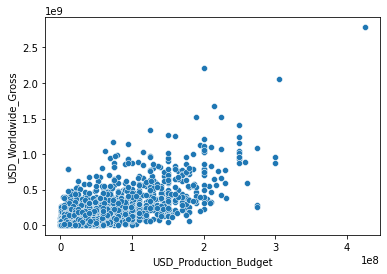

In [51]:
# 산점도 그리기 
sns.scatterplot(data=data_clean,
               x='USD_Production_Budget',
               y='USD_Worldwide_Gross')
plt.show()

- "Seaborn"으로 산점도를 만들려면, 축으로 사용할 데이터프레임과 열 이름을 제공하면 된다. 
- "Seaborn"은 "Matplotlib"을 기반으로 만들어졌기 때문에, 언제든지 Matplotlib 레이어로 이동해서 차트를 구성할 수 있다.

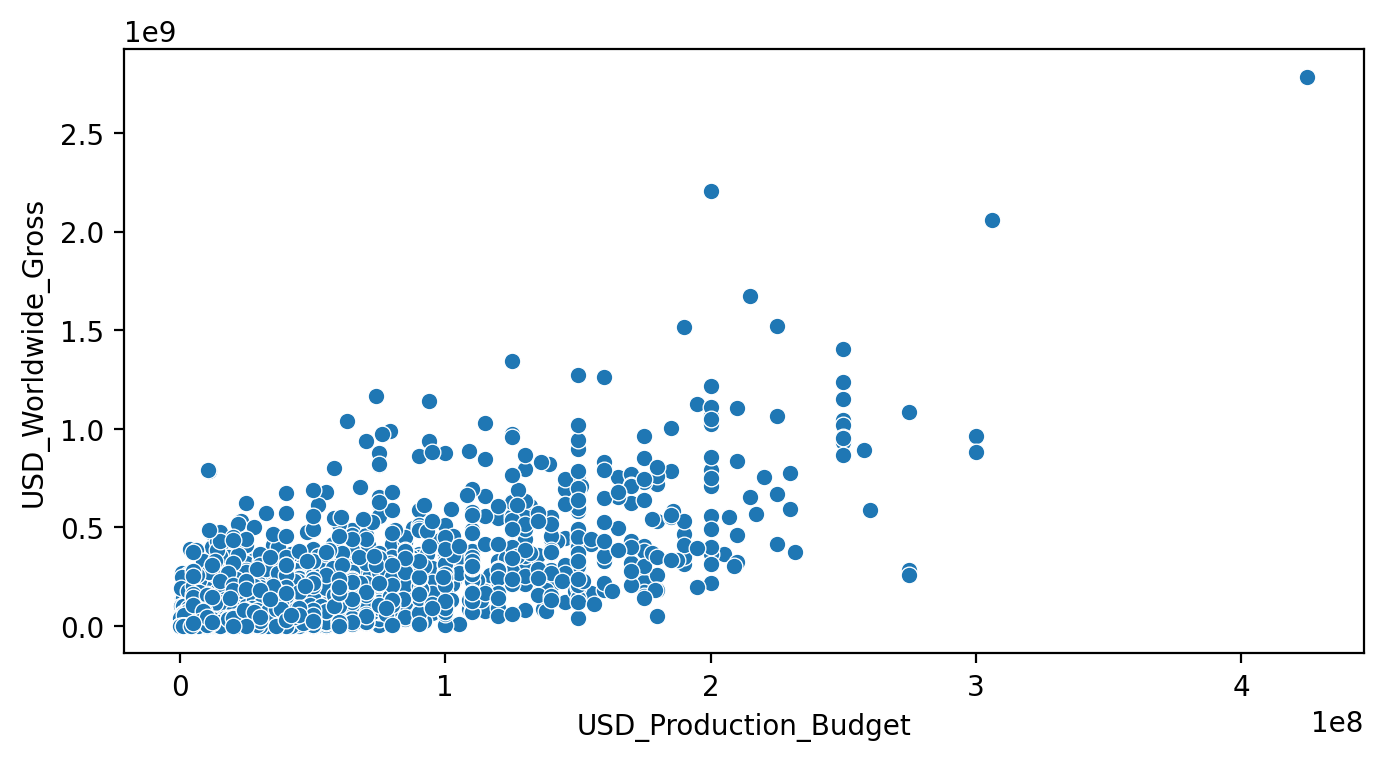

In [52]:
# 산점도 차트 크기 설정
plt.figure(figsize=(8, 4), dpi=200)          # 산점도 차트 크기 설정 

sns.scatterplot(data=data_clean,             # 산점도 차트 데이터 설정
               x='USD_Production_Budget',
               y='USD_Worldwide_Gross')
plt.show()                                   # 산점도 차트 실행

- 만약 위의 차트에서 스타일을 지정하려면, "sns.scatterplot()"에서 반환해주는 "Axes" 객체를 구성해주면 된다.

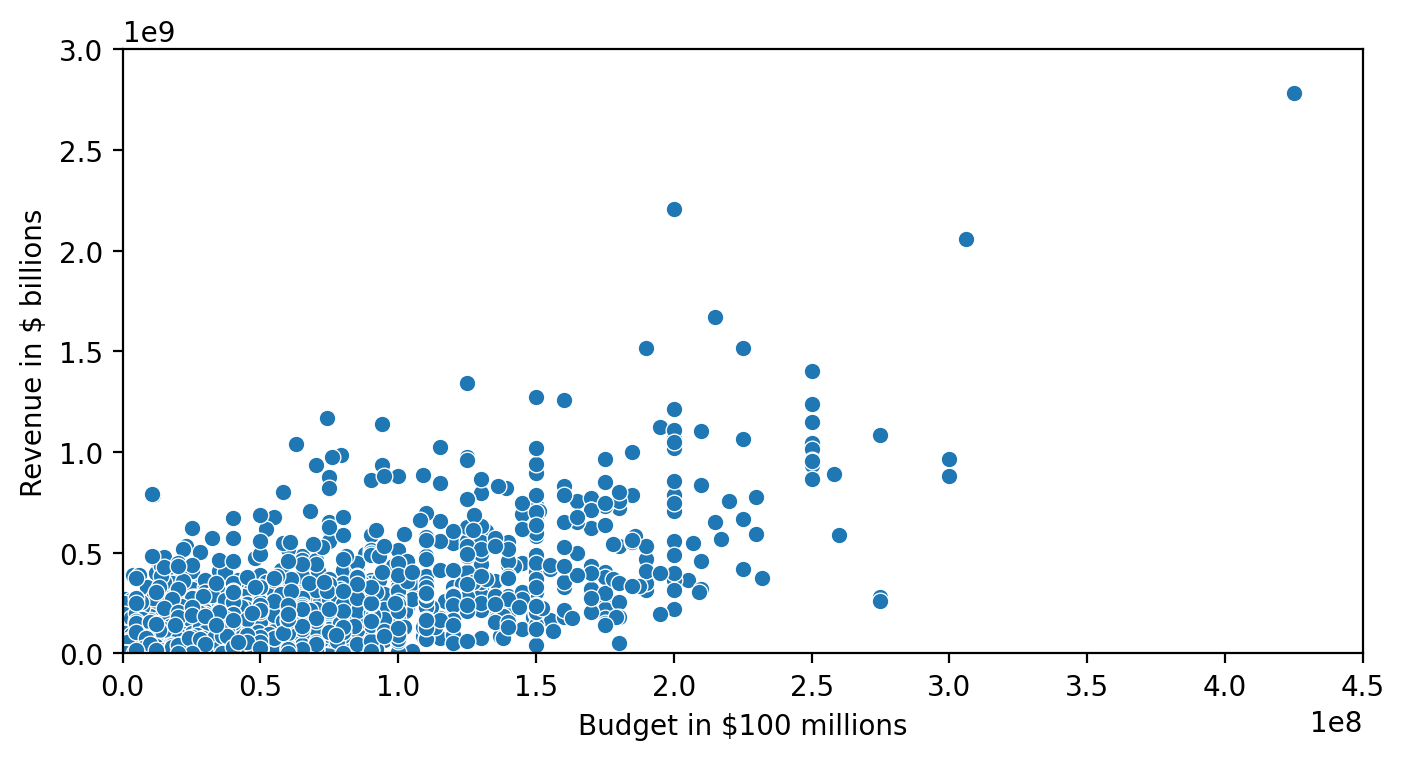

In [55]:
# seaborn 차트 스타일 구성 - Axes 객체 구성
plt.figure(figsize=(8, 4), dpi=200)               # 산점도 차트 크기 설정 

ax = sns.scatterplot(data=data_clean,             # 산점도 차트 데이터 설정 - Axes 객체 생성
               x='USD_Production_Budget',
               y='USD_Worldwide_Gross')

ax.set(ylim=(0, 3000000000),                      # style 설정 - y축 범위 설정 
       xlim=(0, 450000000),                       # x축 범위 설정  
       ylabel='Revenue in $ billions',            # y축 레이블 설정 
       xlabel='Budget in $100 millions')          # x축 레이블 설정 

plt.show()                                        # 산점도 차트 실행

- "Axes" 객체 구성 후 스타일을 설정하였다. 여기서 부터는 Matplotlib 레이어로 이동해서, 축 한계를 설정하고 레이블을 변경해준다.

#### 4-3. 산점도에서 거품 차트까지
- Bubble Chart를 위해 우리가 "Seaborn"을 사용하는 이유는 Bubble Chart를 "hue"와 "size" 매개변수를 이용해 쉽게 구성할 수 있기 때문이다. 
- 이 매개변수들을 통해 데이터프레임의 열에 색상을 지정하고 열 크기를 바꿀 수 있다.

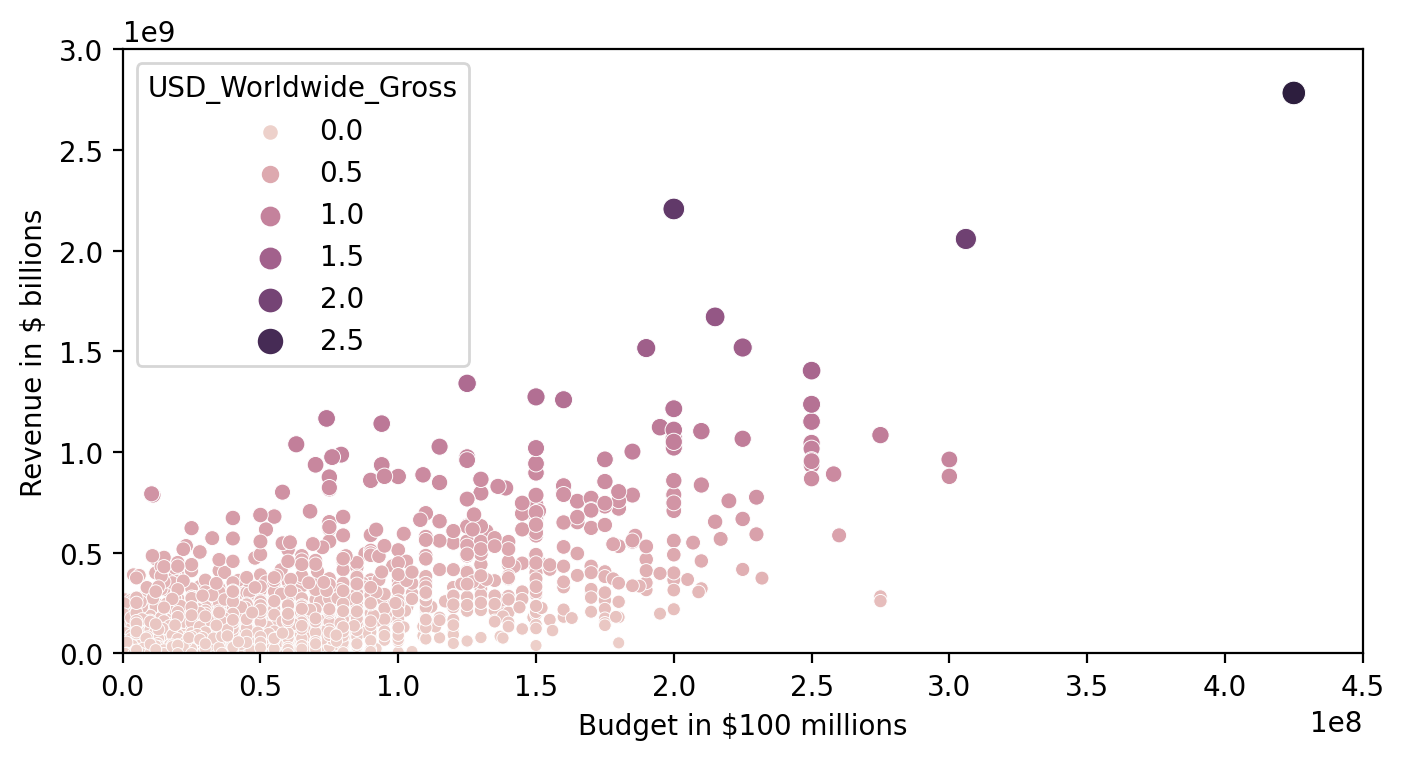

In [56]:
# Bubble Chart 그리기 
plt.figure(figsize=(8, 4), dpi=200)

ax = sns.scatterplot(data=data_clean,                    # 산점도 차트 데이터 설정 - Axes 객체 생성
                    x='USD_Production_Budget',           # x축 설정  
                    y='USD_Worldwide_Gross',             # y축 설정
                    hue='USD_Worldwide_Gross',           # color 설정 및 기준 데이터 
                    size='USD_Worldwide_Gross')          # dotsize 설정 및 기준 데이터  

ax.set(ylim=(0, 3000000000),                             # style 설정 - y축 범위 설정 
       xlim=(0, 450000000),                              # x축 범위 설정  
       ylabel='Revenue in $ billions',                   # y축 레이블 설정 
       xlabel='Budget in $100 millions')                 # x축 레이블 설정 

plt.show()                                               # 산점도 차트 실행

- 위의 설정들로 고수익 영화들과 아닌 영화들을 구분할 수 있다. (어두운색이 고수익, 연한색이 저수익 영화)
- "Seaborn"은 이외에도 여러 편리한 스타일링 옵션을 제공한다.

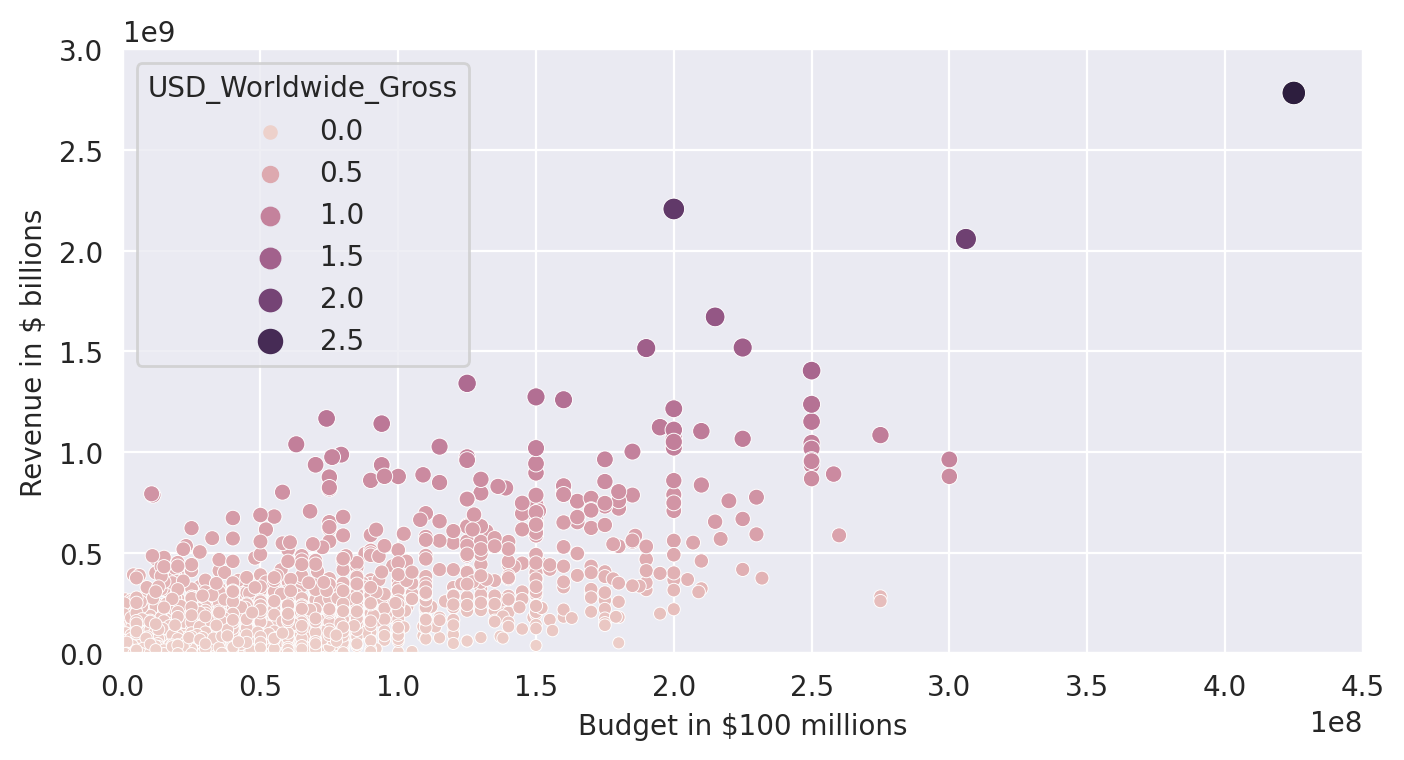

In [58]:
# Bubble Chart 그리기 - with 키워드 사용
plt.figure(figsize=(8, 4), dpi=200)

# 지정한 style을 단일 차트(전체 노트북의 차트가 아닌 차트)로 설정
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=data_clean,                    # 산점도 차트 데이터 설정 - Axes 객체 생성
                        x='USD_Production_Budget',           # x축 설정  
                        y='USD_Worldwide_Gross',             # y축 설정
                        hue='USD_Worldwide_Gross',           # color 설정 및 기준 데이터 
                        size='USD_Worldwide_Gross')          # dotsize 설정 및 기준 데이터  

    ax.set(ylim=(0, 3000000000),                             # style 설정 - y축 범위 설정 
           xlim=(0, 450000000),                              # x축 범위 설정  
           ylabel='Revenue in $ billions',                   # y축 레이블 설정 
           xlabel='Budget in $100 millions')                 # x축 레이블 설정 

- 단일 차트(전체 노트북의 차트가 아닌)에서 스타일을 설정하려면 파이썬의 with 키워드를 사용하면 된다.

#### 4-4. 시간별 영화 예산

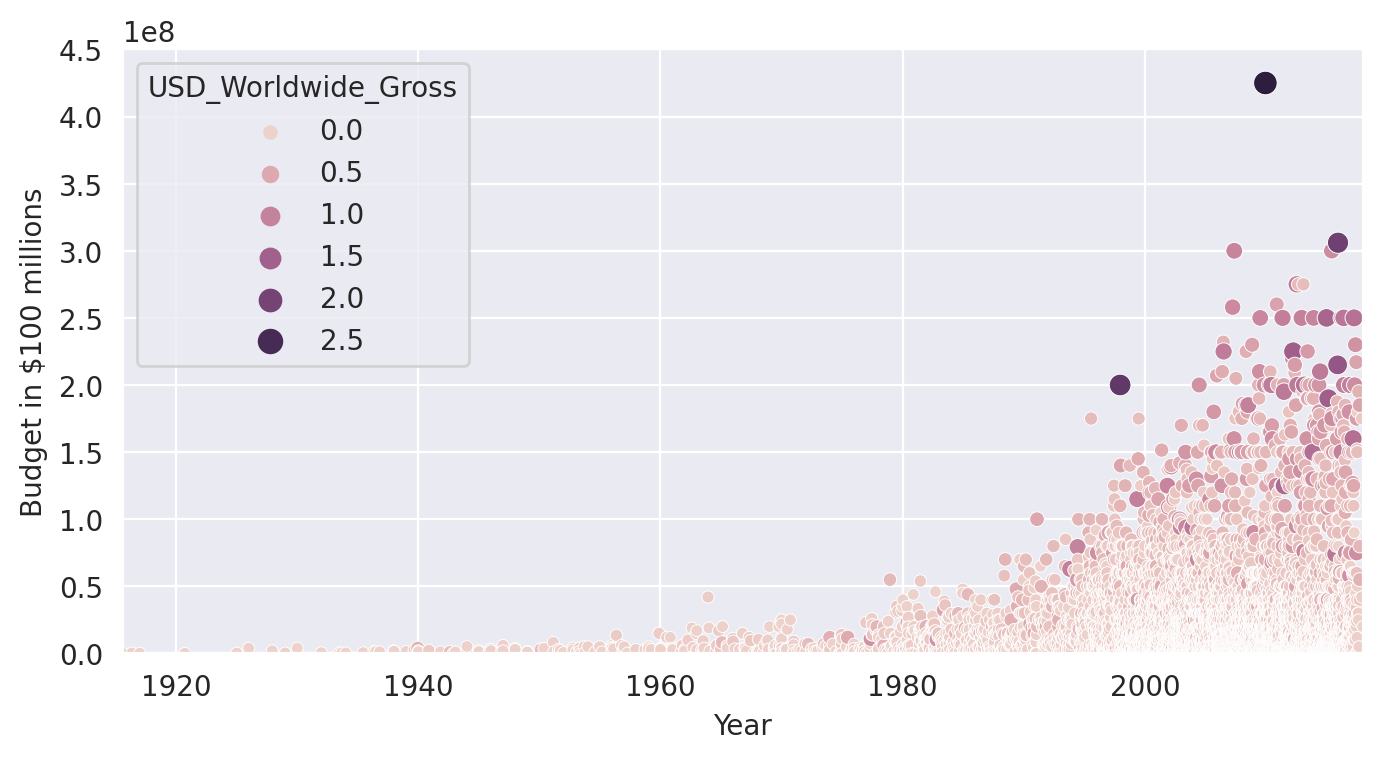

In [61]:
# 시간별 영화 예산 차트 
plt.figure(figsize=(8, 4), dpi=200)

# 지정한 style을 단일 차트(전체 노트북의 차트가 아닌 차트)로 설정
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=data_clean,                    # 산점도 차트 데이터 설정 - Axes 객체 생성
                        x='Release_Date',                    # x축 설정 - 날짜
                        y='USD_Production_Budget',           # y축 설정 - 영화 예산 
                        hue='USD_Worldwide_Gross',           # color 설정 및 기준 데이터 
                        size='USD_Worldwide_Gross')          # dotsize 설정 및 기준 데이터  

    ax.set(ylim=(0, 450000000),                              # style 설정 - y축 범위 설정 
           xlim=(data_clean.Release_Date.min(),              # x축 범위 설정 - 최소 날짜, 최대 날짜  
                 data_clean.Release_Date.max()),                              
           ylabel='Budget in $100 millions',                 # y축 레이블 설정 
           xlabel='Year')                                    # x축 레이블 설정 

- 위의 차트를 보고 어떤 것을 확인할 수 있을까? 먼저 영화 예산은 지난 40년간 폭발적으로 증가했다. 1970년대 까지 영화 산업은 완전히 다른 시대에 있었다.
- 하지만 1980년대 부터 2000년대 까지 예산은 빠르게 증가했다. 또한 산업 전체가 훨씬 더 많은 영화를 만들면서 크게 늘어났다. 2000년대 부터는 데이터의 수가 매우 조밀하여 중복으로 표시 되었다.